# Análise da Inflação Brasileira

In [1]:
import numpy as np
import pandas as pd
import sidrapy as sidra
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
import json

warnings.filterwarnings('ignore')

In [24]:
# Definindo a paleta de cores
caminho = r"C:\Users\divtec-dados\DataspellProjects\MarcioNotebooks\Configuracoes\paleta_01.json"

with open(caminho, "r", encoding="utf-8") as paleta_cores:
    dados = json.load(paleta_cores)

# Definindo variáveis de cores
COR_PRIMARIA = dados["PRIMARIA"]
COR_SECUNDARIA = dados["SECUNDARIA"]
COR_SUCESSO = dados["SUCESSO"]
COR_PERIGO = dados["PERIGO"]
COR_ATENCAO = dados["ATENCAO"]


In [19]:
def safe_convert(x):
	try:
		return float(x)
	except ValueError:
		return None

## IPCA
<hr>

In [2]:
indices = '315/7169,7170,7202,7212,7215'
periodo = "202301, 202302,202303,202304, 202305, 202306, 202307, 202308, 202309, 202310, 202311,202312,202401, 202402,202403,202404, 202405, 202406, 202407, 202408, 202409, 202410, 202411,202412,202501, 202502,202503,202504, 202505, 202506"

dados_sidra_poa = sidra.get_table(
	table_code = "7060",             # código da tabela de interesse
	territorial_level = "7",         # nível territorial
	ibge_territorial_code = "4301",   # desagregações desse nível
	variable = "63,69,66,2265",                 # variável = IPCA - Variação mensal (%)
	classification = indices,
	period = periodo                 # todas as observações
)

dados_sidra_brasil = sidra.get_table(
	table_code = "7060",             # código da tabela de interesse
	territorial_level = "1",         # nível territorial
	ibge_territorial_code = "all",   # desagregações desse nível
	variable = "63,69,66,2265",                 # variável = IPCA - Variação mensal (%)
	classification = indices,
	period =  periodo
)

In [3]:
x = dados_sidra_brasil
x = x[['D4N','D3N','NN','V','MN','D2C']]
x = x.sort_values(by=['D4N','D3N','D2C'])
x

,D4N,D3N,NN,V,MN,D2C
12,1.Alimentação e bebidas,IPCA - Peso mensal,Brasil,21.8645,%,202301
32,1.Alimentação e bebidas,IPCA - Peso mensal,Brasil,21.8797,%,202302
52,1.Alimentação e bebidas,IPCA - Peso mensal,Brasil,21.7326,%,202303
72,1.Alimentação e bebidas,IPCA - Peso mensal,Brasil,21.5922,%,202304
92,1.Alimentação e bebidas,IPCA - Peso mensal,Brasil,21.6157,%,202305
...,...,...,...,...,...,...
481,Índice geral,IPCA - Variação mensal,Brasil,0.16,%,202501
501,Índice geral,IPCA - Variação mensal,Brasil,1.31,%,202502
521,Índice geral,IPCA - Variação mensal,Brasil,0.56,%,202503
541,Índice geral,IPCA - Variação mensal,Brasil,0.43,%,202504


In [22]:
# descricao = 'Índice geral'
# descricao = '5.Transportes'
descricao = '1.Alimentação e bebidas'
indice = 'IPCA - Variação mensal'

x = dados_sidra_poa.loc[(dados_sidra_poa['D4N'] == descricao) & (dados_sidra_poa['D3N'] == indice)][['D1N','D2C','D3N','D4N','V']]
x

,D1N,D2C,D3N,D4N,V
2,Porto Alegre (RS),202301,IPCA - Variação mensal,1.Alimentação e bebidas,-0.02
22,Porto Alegre (RS),202302,IPCA - Variação mensal,1.Alimentação e bebidas,0.43
42,Porto Alegre (RS),202303,IPCA - Variação mensal,1.Alimentação e bebidas,0.60
62,Porto Alegre (RS),202304,IPCA - Variação mensal,1.Alimentação e bebidas,1.17
82,Porto Alegre (RS),202305,IPCA - Variação mensal,1.Alimentação e bebidas,-0.23
102,Porto Alegre (RS),202306,IPCA - Variação mensal,1.Alimentação e bebidas,-0.54
122,Porto Alegre (RS),202307,IPCA - Variação mensal,1.Alimentação e bebidas,-0.44
142,Porto Alegre (RS),202308,IPCA - Variação mensal,1.Alimentação e bebidas,-1.11
162,Porto Alegre (RS),202309,IPCA - Variação mensal,1.Alimentação e bebidas,-0.83
182,Porto Alegre (RS),202310,IPCA - Variação mensal,1.Alimentação e bebidas,-0.38


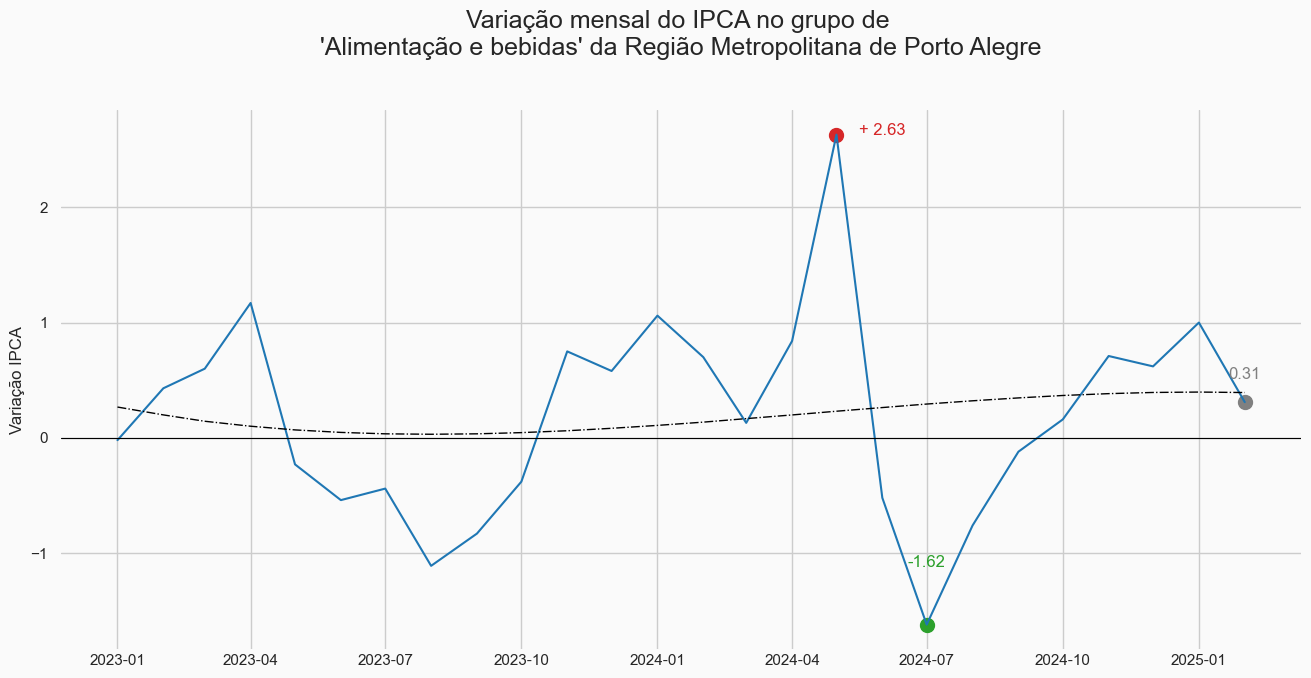

In [26]:
# Convertendo a coluna Date para o formato datetime
x['D2C'] = pd.to_datetime(x['D2C'], format='%Y%m')
x['V'] = x['V'].astype(float)

# Encontrando os valores máximo, mínimo e o último valor
total_rows = len(x)
max_idx = x['V'].idxmax()
min_idx = x['V'].idxmin()
last_idx = total_rows - 1

max_point = x.loc[max_idx]
min_point = x.loc[min_idx]
last_point = x.iloc[last_idx]

# Criando a linha de tendência com um polinômio de grau 3
x_numeric = np.arange(len(x))  # Criando um eixo X numérico para o ajuste
coef = np.polyfit(x_numeric, x['V'], 3)  # Ajuste polinomial de grau 3
trend_poly = np.poly1d(coef)(x_numeric)  # Criando os valores da linha

# Definindo o estilo e a cor de fundo
sns.set_theme(style='white', rc={'axes.facecolor': '#FAFAFA', 'figure.facecolor': '#FAFAFA'})

fig, ax = plt.subplots(figsize=(16, 7))

# Plotando os dados usando Seaborn
sns.lineplot(data=x, x='D2C', y='V', ax=ax, color=COR_PRIMARIA, linewidth=1.5)

# Plotando a linha de tendência polinomial
ax.plot(x['D2C'], trend_poly, linestyle='-.', color='black', linewidth=1, label='Tendência')

# Adicionando scatter para os valores máximo, mínimo e o último valor
ax.scatter(max_point['D2C'], max_point['V'], color=COR_PERIGO, s=100, label='Máximo')
ax.scatter(min_point['D2C'], min_point['V'], color=COR_SUCESSO, s=100, label='Mínimo')
ax.scatter(last_point['D2C'], last_point['V'], color='gray', s=100, label='Último Valor')

# Adicionando os valores numéricos acima dos pontos
ax.text(max_point['D2C'] + pd.Timedelta(days=15), max_point['V'], f"+ {max_point['V']:.2f}",
		color=COR_PERIGO, fontsize=12, ha='left')
ax.text(min_point['D2C'], min_point['V'] + 0.5, f"{min_point['V']:.2f}",
		color=COR_SUCESSO, fontsize=12, ha='center')
ax.text(last_point['D2C'], last_point['V'] + 0.2, f"{last_point['V']:.2f}",
		color='gray', fontsize=12, ha='center')

# Adicionando uma linha horizontal em Y=0
ax.axhline(0, color='black', linewidth=0.8, linestyle='-')

# Removendo as linhas do eixo X, mas mantendo a legenda
ax.tick_params(axis='x', which='both', length=0)

# Exibir marcações no eixo Y
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.yaxis.set_visible(True)

# Adicionando título e legendas
plt.title("Variação mensal do IPCA no grupo de \n'Alimentação e bebidas' da Região Metropolitana de Porto Alegre", pad=40, fontsize=18)
plt.xlabel("")
plt.ylabel("Variação IPCA")
# plt.legend(loc='best')
plt.grid(True)
sns.despine(left=True, bottom=True)  # Mantendo as bordas laterais para o eixo Y
plt.show()


### Manipulação das tabelas

In [27]:
ipca_poa = dados_sidra_poa[['D1N','D3N','D2C','D4N','V']]
ipca_poa = ipca_poa.drop(index=0)
ipca_poa['V'] = ipca_poa['V'].astype('float')

ipca_brasil = dados_sidra_brasil[['D1N','D3N','D2C','D4N','V']]
ipca_brasil = ipca_brasil.drop(index=0)
ipca_brasil['V'] = ipca_brasil['V'].astype('float')

ipca_poa = ipca_poa.pivot_table(values='V', index=['D2C','D3N'], columns='D4N')
ipca_brasil = ipca_brasil.pivot_table(values='V', index=['D2C','D3N'], columns='D4N')

In [28]:
ipca_poa

D4N                                           1.Alimentação e bebidas  \
D2C    D3N                                                              
202301 IPCA - Peso mensal                                     22.1456   
       IPCA - Variação acumulada em 12 meses                  12.2000   
       IPCA - Variação acumulada no ano                       -0.0200   
       IPCA - Variação mensal                                 -0.0200   
202302 IPCA - Peso mensal                                     22.0912   
...                                                               ...   
202501 IPCA - Variação mensal                                  1.0000   
202502 IPCA - Peso mensal                                     21.4270   
       IPCA - Variação acumulada em 12 meses                   3.3600   
       IPCA - Variação acumulada no ano                        1.3100   
       IPCA - Variação mensal                                  0.3100   

D4N                                           1103003.Batata-inglesa  \
D2C    D3N                                                             
202301 IPCA - Peso mensal                                     0.3027   
       IPCA - Variação acumulada em 12 meses                 64.6300   
       IPCA - Variação acumulada no ano                      11.5500   
       IPCA - Variação mensal                                11.5500   
202302 IPCA - Peso mensal                                     0.3369   
...                                                              ...   
202501 IPCA - Variação mensal                               -24.7500   
202502 IPCA - Peso mensal                                     0.1809   
       IPCA - Variação acumulada em 12 meses                -58.6100   
       IPCA - Variação acumulada no ano                     -30.0800   
       IPCA - Variação mensal                                -7.0900   

D4N                                           1103028.Tomate  1103043.Cebola  \
D2C    D3N                                                                     
202301 IPCA - Peso mensal                             0.3183          0.4646   
       IPCA - Variação acumulada em 12 meses         11.3100         70.9700   
       IPCA - Variação acumulada no ano             -13.2500        -28.6400   
       IPCA - Variação mensal                       -13.2500        -28.6400   
202302 IPCA - Peso mensal                             0.2755          0.3308   
...                                                      ...             ...   
202501 IPCA - Variação mensal                        -3.2000         -2.8200   
202502 IPCA - Peso mensal                             0.1793          0.1815   
       IPCA - Variação acumulada em 12 meses        -39.7500        -46.2700   
       IPCA - Variação acumulada no ano              -7.3900         -6.2200   
       IPCA - Variação mensal                        -4.3300         -3.5000   

D4N                                           Índice geral  
D2C    D3N                                                  
202301 IPCA - Peso mensal                           100.00  
       IPCA - Variação acumulada em 12 meses          4.40  
       IPCA - Variação acumulada no ano               0.23  
       IPCA - Variação mensal                         0.23  
202302 IPCA - Peso mensal                           100.00  
...                                                    ...  
202501 IPCA - Variação mensal                        -0.03  
202502 IPCA - Peso mensal                           100.00  
       IPCA - Variação acumulada em 12 meses          4.20  
       IPCA - Variação acumulada no ano               1.26  
       IPCA - Variação mensal                         1.29  

[104 rows x 5 columns]

In [29]:
meses = ipca_poa.index.get_level_values(0).unique()

# Iterar sobre os meses e calcular as novas linhas
for mes in meses:
	nova_linha = {}
	df_mes = ipca_poa.loc[mes]

	for column in df_mes.columns:
		# Calcular a participação com base nos dados das colunas do DataFrame ipca
		participacao = round(df_mes.loc['IPCA - Peso mensal', column] * (df_mes.loc['IPCA - Variação mensal', column] / 100),4)
		nova_linha[column] = participacao

	# Adicionar a nova linha ao DataFrame
	new_index = pd.MultiIndex.from_tuples([(mes, 'Participação no índice Mensal')], names=['Mes', 'Índice'])
	nova_linha_df = pd.DataFrame(nova_linha, index=new_index)
	ipca_poa = pd.concat([ipca_poa, nova_linha_df])

ipca_poa = ipca_poa.sort_index()

# Iterar sobre os meses e calcular as novas linhas
for mes in meses:
	nova_linha = {}
	df_mes = ipca_brasil.loc[mes]

	for column in df_mes.columns:
		# Calcular a participação com base nos dados das colunas do DataFrame ipca
		participacao = round(df_mes.loc['IPCA - Peso mensal', column] * (df_mes.loc['IPCA - Variação mensal', column] / 100),4)
		nova_linha[column] = participacao

	# Adicionar a nova linha ao DataFrame
	new_index = pd.MultiIndex.from_tuples([(mes, 'Participação no índice Mensal')], names=['Mes', 'Índice'])
	nova_linha_df = pd.DataFrame(nova_linha, index=new_index)
	ipca_brasil = pd.concat([ipca_brasil, nova_linha_df])

ipca_brasil = ipca_brasil.sort_index()

In [30]:
ipca_poa

1.Alimentação e bebidas  \
202301 IPCA - Peso mensal                                     22.1456   
       IPCA - Variação acumulada em 12 meses                  12.2000   
       IPCA - Variação acumulada no ano                       -0.0200   
       IPCA - Variação mensal                                 -0.0200   
       Participação no índice Mensal                          -0.0044   
...                                                               ...   
202502 IPCA - Peso mensal                                     21.4270   
       IPCA - Variação acumulada em 12 meses                   3.3600   
       IPCA - Variação acumulada no ano                        1.3100   
       IPCA - Variação mensal                                  0.3100   
       Participação no índice Mensal                           0.0664   

                                              1103003.Batata-inglesa  \
202301 IPCA - Peso mensal                                     0.3027   
       IPCA - Variação acumulada em 12 meses                 64.6300   
       IPCA - Variação acumulada no ano                      11.5500   
       IPCA - Variação mensal                                11.5500   
       Participação no índice Mensal                          0.0350   
...                                                              ...   
202502 IPCA - Peso mensal                                     0.1809   
       IPCA - Variação acumulada em 12 meses                -58.6100   
       IPCA - Variação acumulada no ano                     -30.0800   
       IPCA - Variação mensal                                -7.0900   
       Participação no índice Mensal                         -0.0128   

                                              1103028.Tomate  1103043.Cebola  \
202301 IPCA - Peso mensal                             0.3183          0.4646   
       IPCA - Variação acumulada em 12 meses         11.3100         70.9700   
       IPCA - Variação acumulada no ano             -13.2500        -28.6400   
       IPCA - Variação mensal                       -13.2500        -28.6400   
       Participação no índice Mensal                 -0.0422         -0.1331   
...                                                      ...             ...   
202502 IPCA - Peso mensal                             0.1793          0.1815   
       IPCA - Variação acumulada em 12 meses        -39.7500        -46.2700   
       IPCA - Variação acumulada no ano              -7.3900         -6.2200   
       IPCA - Variação mensal                        -4.3300         -3.5000   
       Participação no índice Mensal                 -0.0078         -0.0064   

                                              Índice geral  
202301 IPCA - Peso mensal                           100.00  
       IPCA - Variação acumulada em 12 meses          4.40  
       IPCA - Variação acumulada no ano               0.23  
       IPCA - Variação mensal                         0.23  
       Participação no índice Mensal                  0.23  
...                                                    ...  
202502 IPCA - Peso mensal                           100.00  
       IPCA - Variação acumulada em 12 meses          4.20  
       IPCA - Variação acumulada no ano               1.26  
       IPCA - Variação mensal                         1.29  
       Participação no índice Mensal                  1.29  

[130 rows x 5 columns]

#### Porto Alegre
<hr>

In [31]:
ipca_poa = ipca_poa.reset_index()
ipca_poa.rename(columns={'level_1':'Indice','level_0':'mes'}, inplace=True)
ipca_poa = ipca_poa[ipca_poa['Indice'] != 'IPCA - Peso mensal']
ipca_poa

,mes,Indice,1.Alimentação e bebidas,1103003.Batata-inglesa,1103028.Tomate,1103043.Cebola,Índice geral
1,202301,IPCA - Variação acumulada em 12 meses,12.2000,64.6300,11.3100,70.9700,4.40
2,202301,IPCA - Variação acumulada no ano,-0.0200,11.5500,-13.2500,-28.6400,0.23
3,202301,IPCA - Variação mensal,-0.0200,11.5500,-13.2500,-28.6400,0.23
4,202301,Participação no índice Mensal,-0.0044,0.0350,-0.0422,-0.1331,0.23
6,202302,IPCA - Variação acumulada em 12 meses,11.1000,20.6300,-18.3600,32.9100,4.74
...,...,...,...,...,...,...,...
124,202501,Participação no índice Mensal,0.2121,-0.0595,-0.0059,-0.0053,-0.03
126,202502,IPCA - Variação acumulada em 12 meses,3.3600,-58.6100,-39.7500,-46.2700,4.20
127,202502,IPCA - Variação acumulada no ano,1.3100,-30.0800,-7.3900,-6.2200,1.26
128,202502,IPCA - Variação mensal,0.3100,-7.0900,-4.3300,-3.5000,1.29


In [ ]:
ipca_poa.to_excel('ipca_poa.xlsx')

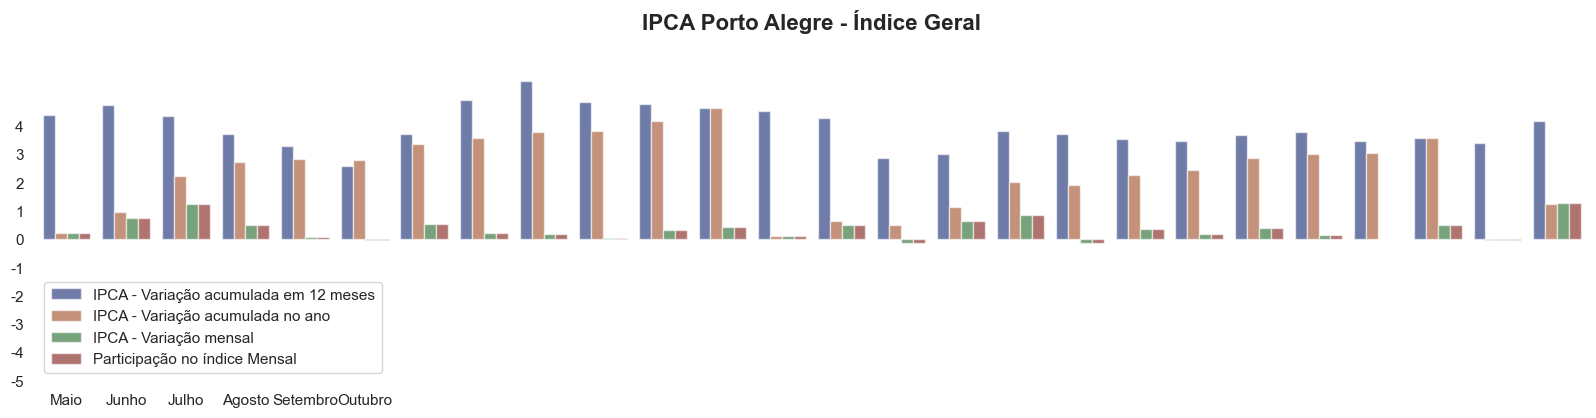

In [32]:

sns.set_theme(style="white")

# Criar o gráfico utilizando barplot
fig, ax = plt.subplots(figsize=(20, 4))
sns.barplot(
	data=ipca_poa,
	x="mes", y="Índice geral", hue="Indice",
	errorbar=('ci', 95), palette="dark", alpha=.6, ax=ax
)

# # Escrevendo os valores de cada barra no gráfico
# for i, valor in enumerate(ipca_poa['1.Alimentação e bebidas']):
# 	qtd = f'{(valor):,.0f}'.replace(',','.')
# 	ax.text(valor, i, qtd, color= CINZA5, fontsize=10, fontweight='bold', ha='right', va='center')

ax.set_xticklabels(['Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro'])
ax.set_yticklabels([x for x in range(-5,5,1)])
ax.set_yticks([x for x in range(-5,5,1)])

sns.despine(bottom=True, left=True)

title_font = {'fontsize': 16, 'fontweight': 'bold'}
ax.set_title("IPCA Porto Alegre - Índice Geral", fontdict=title_font, loc='center', pad=20, y=1.05)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend(loc='best')

plt.show()


## IPCA-15
<hr>

In [37]:
periodo = "202405, 202406, 202407, 202408, 202409, 202410, 202411, 202412, 202501,202502,202503,202504"
tuberculos_raizes_legumes = "7201,7202,7204,7206,7209,7212,7215,7216"
hortalicas_verduras = "7242,7246,7248,7253"
frutas = "7256,7266,7270,7276"
aves_ovos = "7349"

indices_ipca_15_produtos = f"315/7169,7170,7200,7241,7254,7283,7303,7372,7389,{tuberculos_raizes_legumes},{hortalicas_verduras},{frutas},{aves_ovos}"

dados_ipca_15_bruto = sidra.get_table(
	table_code = "7062",
	territorial_level = "7", # RM POA
	ibge_territorial_code = "4301",
	variable = "355,1120,357",
	period = periodo,
	classification = indices_ipca_15_produtos,
)

dados_ipca_15_bruto_produtos = sidra.get_table(
	table_code = "7062",
	territorial_level = "7", # RM POA
	ibge_territorial_code = "4301",
	variable = "355",
	period = periodo,
	classification = indices_ipca_15_produtos,
)

### IPCA-15 por produtos

In [38]:
ipca_15_produtos = dados_ipca_15_bruto_produtos.copy(deep=True)
ipca_15_produtos['V'] = ipca_15_produtos['V'].apply(safe_convert)
ipca_15_produtos.pivot_table(index=['D4N'], columns=['D2C'], values=['V'])

V                                     \
D2C                               202405 202406 202407 202408 202409 202410   
D4N                                                                           
1.Alimentação e bebidas             1.15   1.57  -0.94  -1.53  -0.30  -0.01   
1103.Tubérculos, raízes e legumes  12.03   4.31  -7.43 -14.13 -13.29  -6.05   
1103003.Batata-inglesa              6.07  10.18   0.87 -10.86  -8.64  -9.27   
1103028.Tomate                     12.57   6.96 -14.27 -23.28 -10.33   4.70   
1103043.Cebola                     17.57  -2.30  -7.78  -8.27 -20.08 -11.47   
1103044.Cenoura                     4.58   1.06 -11.44 -22.23 -11.12  -7.87   
1105.Hortaliças e verduras          3.17  16.23  -1.72  -8.08 -10.97  -5.69   
1105001.Alface                      2.66  21.42  -2.18 -10.37 -19.33  -2.44   
1105010.Repolho                     1.98   9.00  -0.46  -6.18   0.34 -13.96   
1105019.Brócolis                    9.24   7.95  -3.74  -9.44  -5.91  -5.95   
1106.Frutas                         1.89  -3.36  -4.81  -3.88   5.38  -4.89   
1106003.Abacaxi                    -5.96   7.57  -2.98  -7.99  10.36  -4.88   
1106017.Maçã                        2.46  -1.98  -3.15  -3.47   2.74   0.18   
1106028.Uva                        -1.31   2.16   0.93  -0.23   0.29  -1.81   
1107.Carnes                         0.58  -0.47  -0.35  -0.28   0.88   0.41   
1108.Pescados                      -2.14   0.98  -1.77  -0.08  -2.47   1.67   
1110.Aves e ovos                    1.21   1.16  -2.30  -0.24  -0.14  -0.40   
1112.Panificados                   -0.94   2.04  -1.12  -0.36   1.11  -0.26   
1114.Bebidas e infusões             1.05   1.11   0.89  -0.40   0.87   0.73   
Índice geral                        0.86   0.41   0.17   0.35   0.32   0.17   

                                                                      
D2C                               202411 202412 202501 202502 202503  
D4N                                                                   
1.Alimentação e bebidas             0.57   0.61   1.16   0.07   1.47  
1103.Tubérculos, raízes e legumes  -1.13 -12.95 -10.31 -13.95   9.55  
1103003.Batata-inglesa              5.21 -11.53 -21.62 -22.21   4.85  
1103028.Tomate                      6.44 -16.15  -5.25 -11.62  17.44  
1103043.Cebola                    -15.96 -11.64  -2.78  -9.24   5.68  
1103044.Cenoura                     1.87  -6.63   6.16  -0.86   5.49  
1105.Hortaliças e verduras         -0.81  -3.08   5.52  -2.74   6.98  
1105001.Alface                      3.46  -4.88   6.93  -2.31   8.56  
1105010.Repolho                    -6.76  -2.54   2.76  -1.52   2.07  
1105019.Brócolis                   -5.67   1.81   5.22  -4.97  11.55  
1106.Frutas                        -0.85  -0.52   3.36  -2.23   3.60  
1106003.Abacaxi                    -0.36   3.89   2.36   5.83   1.18  
1106017.Maçã                        3.11   2.53   3.41  -0.98  -0.05  
1106028.Uva                         2.43  -2.78   4.87  -0.19   1.58  
1107.Carnes                         3.17   5.02   5.55   1.00   0.20  
1108.Pescados                      -0.46  -1.78   0.20   0.57  -0.43  
1110.Aves e ovos                   -0.12  -0.29   3.20   0.10   6.98  
1112.Panificados                   -0.52   0.59   0.85   0.51  -0.15  
1114.Bebidas e infusões             1.00   1.88   0.86   2.16   1.44  
Índice geral                        0.25   0.27  -0.13   1.08   0.78

In [39]:
ipca_15 = dados_ipca_15_bruto.copy(deep=True)
ipca_15 = ipca_15.loc[ipca_15['D3N'] == 'IPCA15 - Variação mensal']
ipca_15['V'] = ipca_15['V'].apply(safe_convert)
ipca_15 = ipca_15.pivot_table(index=['D4N'], columns=['D2C'], values=['V'])
ipca_15 = ipca_15.sort_values(by=['D4N'])
ipca_15

V                                     \
D2C                               202405 202406 202407 202408 202409 202410   
D4N                                                                           
1.Alimentação e bebidas             1.15   1.57  -0.94  -1.53  -0.30  -0.01   
1103.Tubérculos, raízes e legumes  12.03   4.31  -7.43 -14.13 -13.29  -6.05   
1103003.Batata-inglesa              6.07  10.18   0.87 -10.86  -8.64  -9.27   
1103028.Tomate                     12.57   6.96 -14.27 -23.28 -10.33   4.70   
1103043.Cebola                     17.57  -2.30  -7.78  -8.27 -20.08 -11.47   
1103044.Cenoura                     4.58   1.06 -11.44 -22.23 -11.12  -7.87   
1105.Hortaliças e verduras          3.17  16.23  -1.72  -8.08 -10.97  -5.69   
1105001.Alface                      2.66  21.42  -2.18 -10.37 -19.33  -2.44   
1105010.Repolho                     1.98   9.00  -0.46  -6.18   0.34 -13.96   
1105019.Brócolis                    9.24   7.95  -3.74  -9.44  -5.91  -5.95   
1106.Frutas                         1.89  -3.36  -4.81  -3.88   5.38  -4.89   
1106003.Abacaxi                    -5.96   7.57  -2.98  -7.99  10.36  -4.88   
1106017.Maçã                        2.46  -1.98  -3.15  -3.47   2.74   0.18   
1106028.Uva                        -1.31   2.16   0.93  -0.23   0.29  -1.81   
1107.Carnes                         0.58  -0.47  -0.35  -0.28   0.88   0.41   
1108.Pescados                      -2.14   0.98  -1.77  -0.08  -2.47   1.67   
1110.Aves e ovos                    1.21   1.16  -2.30  -0.24  -0.14  -0.40   
1112.Panificados                   -0.94   2.04  -1.12  -0.36   1.11  -0.26   
1114.Bebidas e infusões             1.05   1.11   0.89  -0.40   0.87   0.73   
Índice geral                        0.86   0.41   0.17   0.35   0.32   0.17   

                                                                      
D2C                               202411 202412 202501 202502 202503  
D4N                                                                   
1.Alimentação e bebidas             0.57   0.61   1.16   0.07   1.47  
1103.Tubérculos, raízes e legumes  -1.13 -12.95 -10.31 -13.95   9.55  
1103003.Batata-inglesa              5.21 -11.53 -21.62 -22.21   4.85  
1103028.Tomate                      6.44 -16.15  -5.25 -11.62  17.44  
1103043.Cebola                    -15.96 -11.64  -2.78  -9.24   5.68  
1103044.Cenoura                     1.87  -6.63   6.16  -0.86   5.49  
1105.Hortaliças e verduras         -0.81  -3.08   5.52  -2.74   6.98  
1105001.Alface                      3.46  -4.88   6.93  -2.31   8.56  
1105010.Repolho                    -6.76  -2.54   2.76  -1.52   2.07  
1105019.Brócolis                   -5.67   1.81   5.22  -4.97  11.55  
1106.Frutas                        -0.85  -0.52   3.36  -2.23   3.60  
1106003.Abacaxi                    -0.36   3.89   2.36   5.83   1.18  
1106017.Maçã                        3.11   2.53   3.41  -0.98  -0.05  
1106028.Uva                         2.43  -2.78   4.87  -0.19   1.58  
1107.Carnes                         3.17   5.02   5.55   1.00   0.20  
1108.Pescados                      -0.46  -1.78   0.20   0.57  -0.43  
1110.Aves e ovos                   -0.12  -0.29   3.20   0.10   6.98  
1112.Panificados                   -0.52   0.59   0.85   0.51  -0.15  
1114.Bebidas e infusões             1.00   1.88   0.86   2.16   1.44  
Índice geral                        0.25   0.27  -0.13   1.08   0.78